In [1]:
import importlib
import torch

from pathlib import Path
import datafawn

importlib.reload(datafawn)

<module 'datafawn' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\datafawn\\__init__.py'>

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device('cpu')
    print("CUDA not available, using CPU")

Using GPU: NVIDIA GeForce RTX 5070 Ti Laptop GPU


Dataframe with relative positions created:
Original shape: (615, 117)
New shape: (615, 129)

New bodyparts added:
['back_left_paw_rel', 'back_right_paw_rel', 'front_left_paw_rel', 'front_right_paw_rel']


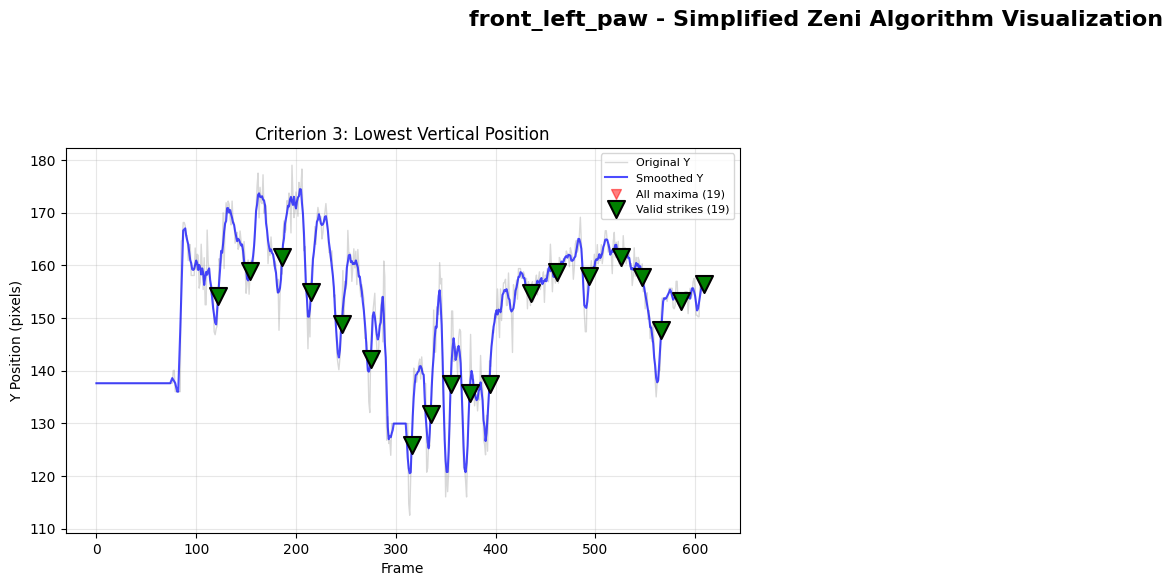

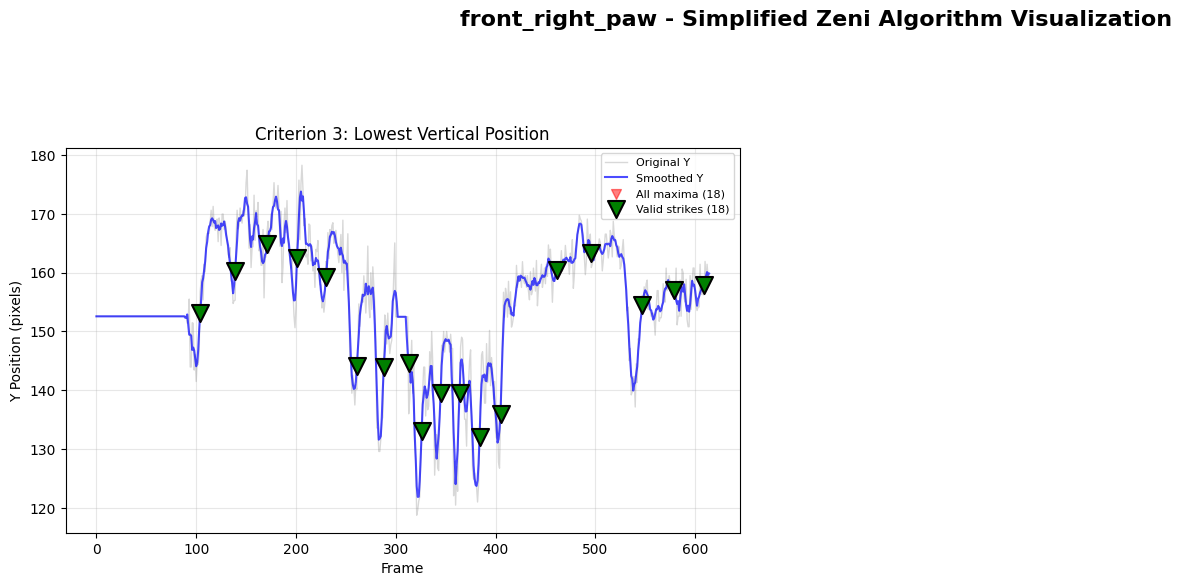

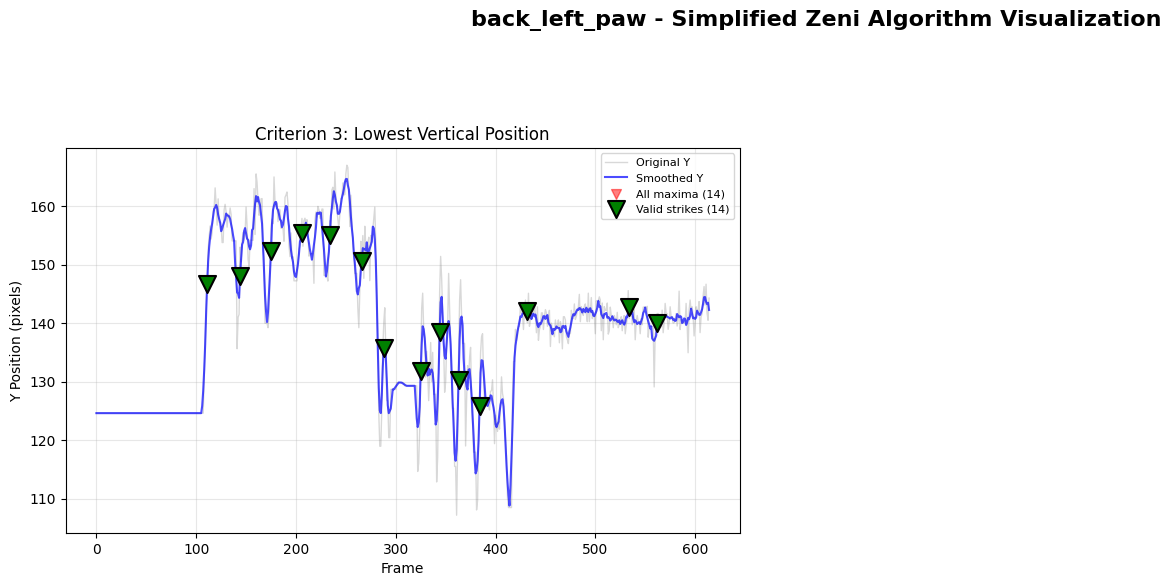

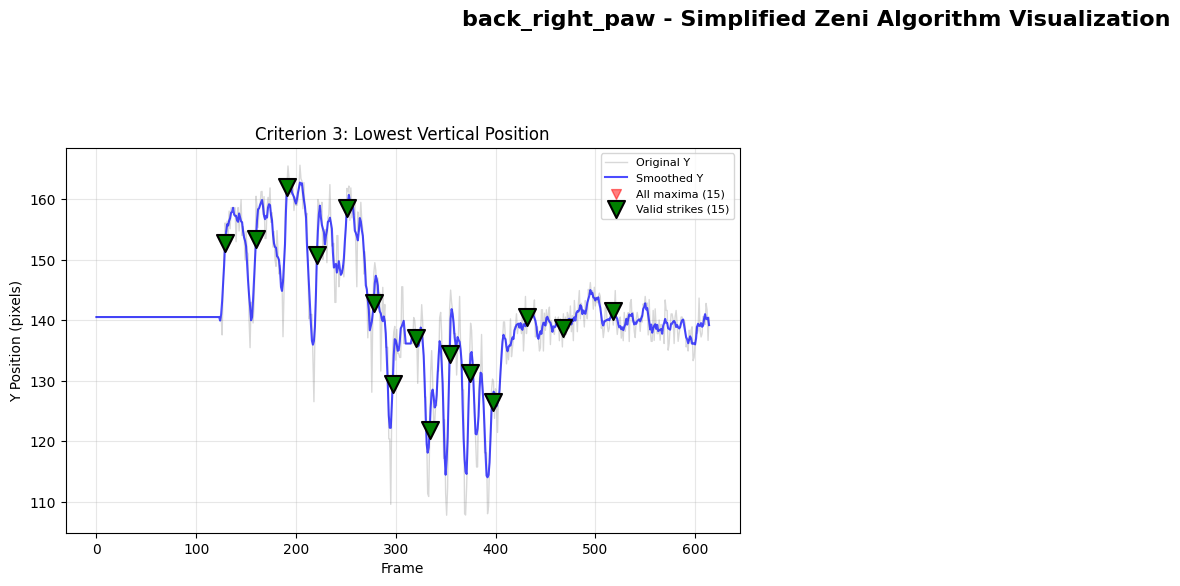

In [ ]:
"""Example: Run pipeline on existing pose data."""

EXAMPLE_DATA_PATH = "deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5"
EXAMPLE_VIDEO_PATH = "videos/deer2.mp4"

# =============== POSE ESTIMATORS =============== #
dlc_estimator = datafawn.DeepLabCutPoseEstimator(
    model_name='superanimal_quadruped',
    detector_name='fasterrcnn_resnet50_fpn_v2',
    hrnet_model='hrnet_w32',
    max_individuals=1,
    pcutoff=0.15,
    dest_folder='processed_vids',
    device=device
)

# =============== POSTPROCESSORS =============== #
paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
rel_paws = ['front_left_paw_rel', 'front_right_paw_rel', 'back_left_paw_rel', 'back_right_paw_rel']
reference_map = {
    'back_base': ['front_left_paw', 'front_right_paw'],
    'tail_base': ['back_left_paw', 'back_right_paw']
}

rel_pp = datafawn.RelativePawPositionPostprocessor()

error_pp = datafawn.ErrorPostprocessor(
    bodyparts=rel_paws,
    use_velocity=True,
    use_likelihood=True,
    use_distance=True,
    velocity_kwargs={'threshold_pixels': 50, 'window_size': 5},
    likelihood_kwargs={'min_likelihood': 0.5},
    distance_kwargs={'reference_map': reference_map, 'max_distance': 300}
    )



# =============== EVENT EXTRACTORS =============== #
zeni_extractor = datafawn.ZeniExtractor(
    extract_smooth_window_size=5,
    extract_prominence_percentage=0.1,
    extract_show_plots=True
)

# Create pipeline
pipeline = datafawn.EventDetectionPipeline(
    pose_estimator=dlc_estimator,
    postprocessors=[rel_pp, error_pp],
    event_extractors=[zeni_extractor]
)

# Run on existing pose data
results = pipeline.run(
    pose_data_path=EXAMPLE_DATA_PATH
    # video_path=EXAMPLE_VIDEO_PATH   # uncomment this to run DLC on raw video first
)



In [4]:
results.keys()

dict_keys(['pose_data', 'postprocessed_data', 'events', 'metadata'])

In [5]:
# Access results
print("Pose data shape:", results['pose_data'].shape)
print("Postprocessed data shape:", results['postprocessed_data'].shape)
print("Event extractors run:", results['metadata']['extractor_names'])

Pose data shape: (615, 117)
Postprocessed data shape: (615, 129)
Event extractors run: ['zeni']


In [6]:
results['events']

{'zeni': {'strikes': {'front_left_paw': [122,
    154,
    186,
    215,
    246,
    275,
    316,
    335,
    355,
    374,
    394,
    436,
    462,
    494,
    526,
    547,
    566,
    586,
    609],
   'front_right_paw': [104,
    139,
    171,
    201,
    230,
    261,
    288,
    313,
    326,
    345,
    364,
    384,
    405,
    462,
    496,
    547,
    579,
    609],
   'back_left_paw': [111,
    144,
    175,
    206,
    234,
    266,
    288,
    325,
    344,
    363,
    384,
    432,
    534,
    562],
   'back_right_paw': [129,
    160,
    191,
    221,
    251,
    278,
    297,
    320,
    334,
    354,
    374,
    397,
    432,
    468,
    518]},
  'metadata': {'window_size': 5,
   'min_contact_duration': 3,
   'velocity_threshold': 10,
   'prominence_percentage': 0.05}}}

# ADD SOUNDS

In [7]:
# TODO: add this to the pipeline

In [8]:
from add_sounds_to_video import add_sounds_for_all_paws

import importlib
import add_sounds_to_video

importlib.reload(add_sounds_to_video)

<module 'add_sounds_to_video' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\add_sounds_to_video.py'>

In [9]:
strikes_parsed = results['events']['zeni']['strikes']
strikes_parsed

{'front_left_paw': [122,
  154,
  186,
  215,
  246,
  275,
  316,
  335,
  355,
  374,
  394,
  436,
  462,
  494,
  526,
  547,
  566,
  586,
  609],
 'front_right_paw': [104,
  139,
  171,
  201,
  230,
  261,
  288,
  313,
  326,
  345,
  364,
  384,
  405,
  462,
  496,
  547,
  579,
  609],
 'back_left_paw': [111,
  144,
  175,
  206,
  234,
  266,
  288,
  325,
  344,
  363,
  384,
  432,
  534,
  562],
 'back_right_paw': [129,
  160,
  191,
  221,
  251,
  278,
  297,
  320,
  334,
  354,
  374,
  397,
  432,
  468,
  518]}

In [11]:
"""
front left: 13, stand still, 1 small step
back left: 12 steps, 1 gathering step
"""

# Define different sounds for each paw
paw_sound_map = {
    # 'front_left_paw': 'sounds/22415__anthousai__wind-chimes/398494__anthousai__wind-chimes-single-01.wav',
    # 'front_right_paw': 'sounds/22415__anthousai__wind-chimes/398493__anthousai__wind-chimes-single-02.wav',
    'back_left_paw': 'sounds/22415__anthousai__wind-chimes/398492__anthousai__wind-chimes-single-03.wav',
    # 'back_right_paw': 'sounds/22415__anthousai__wind-chimes/398496__anthousai__wind-chimes-single-04.wav'
}


# Add all sounds to video at once
output_path = add_sounds_for_all_paws(
    video_path='processed_vids\\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4',
    strikes_dict=strikes_parsed,  # Your strikes from zeni_algorithm
    paw_sound_map=paw_sound_map,
    output_path = 'finished_vids/pipelines_test_1.mp4')

Loading video: processed_vids\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4
Video FPS: 29.97002997002997
Video duration: 20.52 seconds

Processing back_left_paw:
  Found 14 strikes
  Strike timestamps: ['3.70s', '4.80s', '5.84s']...
  Sound duration: 3.19 seconds
  Created 14 audio clips for back_left_paw

Total audio clips created: 14

Writing output video to: finished_vids\pipelines_test_1.mp4
MoviePy - Building video finished_vids\pipelines_test_1.mp4.
MoviePy - Writing audio in pipelines_test_1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video finished_vids\pipelines_test_1.mp4



MoviePy - Done !
MoviePy - video ready finished_vids\pipelines_test_1.mp4
Done! Output saved to: finished_vids\pipelines_test_1.mp4
